In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
theWholeData =pd.read_csv(r'E:\Data_Analysis\PG DS - Capstone\Healthcare - Diabetes\diabetes.csv')

In [3]:
theWholeData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
theWholeData.isnull().values.any()

False

In [5]:
med_val_bloodpressure = theWholeData['BloodPressure'].median() 
count = (theWholeData['BloodPressure'] ==0).sum()
count

35

In [6]:
theWholeData['BloodPressure'] = theWholeData['BloodPressure'].replace(0, med_val_bloodpressure)
# ===============================================================================================

In [7]:
med_val_glucose = theWholeData['Glucose'].median() 
count = (theWholeData['Glucose'] ==0).sum()
count

5

In [8]:
theWholeData['Glucose'] = theWholeData['Glucose'].replace(0, med_val_glucose)
# =============================================================================

In [9]:
med_val_SkinThickness = theWholeData['SkinThickness'].median() 
count = (theWholeData['SkinThickness'] ==0).sum()
count

227

In [10]:
theWholeData['SkinThickness'] = theWholeData['SkinThickness'].replace(0, med_val_SkinThickness)
# =========================================================================================

In [11]:
med_val_BMI = theWholeData['BMI'].median() 
count = (theWholeData['BMI'] ==0).sum()
count

11

In [12]:
theWholeData['BMI'] = theWholeData['BMI'].replace(0, med_val_BMI)
# =====================================================================

In [13]:
med_val_Insulin = theWholeData['Insulin'].median() 
count = (theWholeData['Insulin'] ==0).sum()
count

374

In [14]:
theWholeData['Insulin'] = theWholeData['Insulin'].replace(0, med_val_Insulin)
# =====================================================================

<AxesSubplot:>

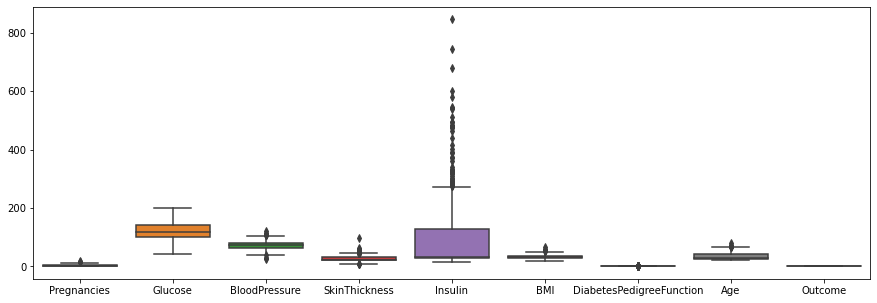

In [15]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(data = theWholeData)

In [16]:
def Outlier(data, cols):
    for column in data.drop(cols, axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            
            data[column] = data[column].apply(lambda x: upper if x>upper else  lower if x<lower else x)          

    return data

df = Outlier(data = theWholeData, cols = ['Outcome'])
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

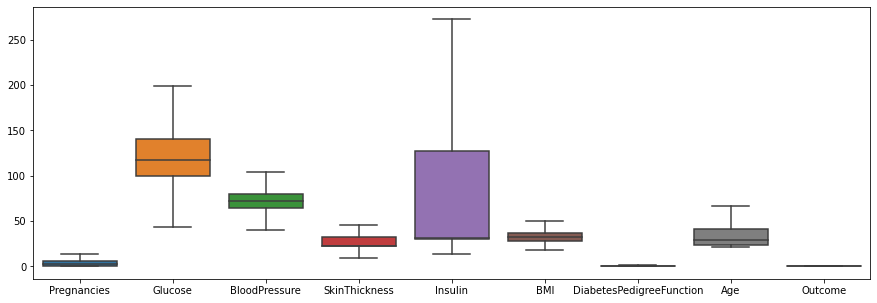

In [17]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(data = df)

C:\Users\Sameriah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


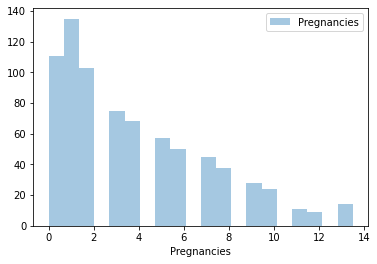

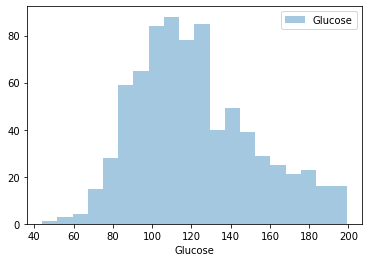

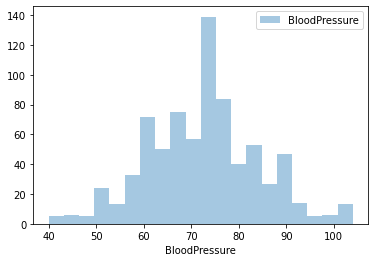

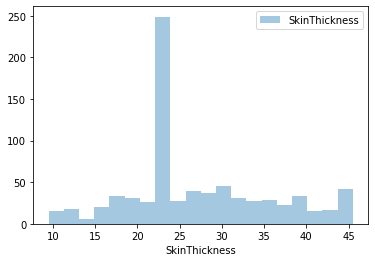

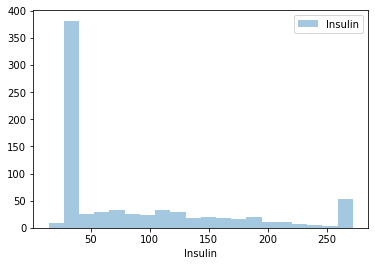

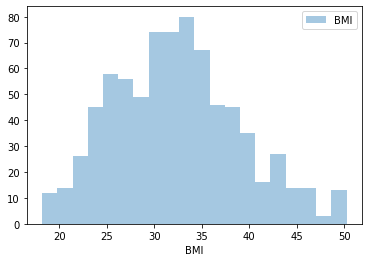

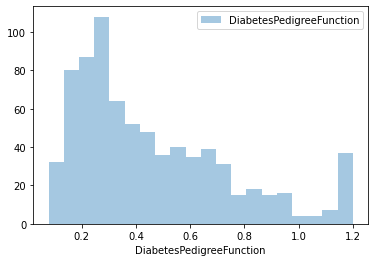

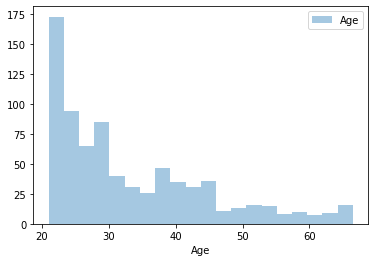

In [18]:
for val in df.drop(['Outcome'], axis = 1):
    sns.distplot(df[val], kde = False,bins=20,label=val)
    plt.legend()
    plt.show()

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,0.047563,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.162030,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.159782,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,0.047563,0.162030,0.159782,1.000000,0.285411,0.562499,0.118426,0.045434,0.191333
Insulin,-0.061192,0.338429,-0.033847,0.285411,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.562499,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.118426,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,0.045434,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.191333,0.147295,0.313030,0.184969,0.242702,1.000000


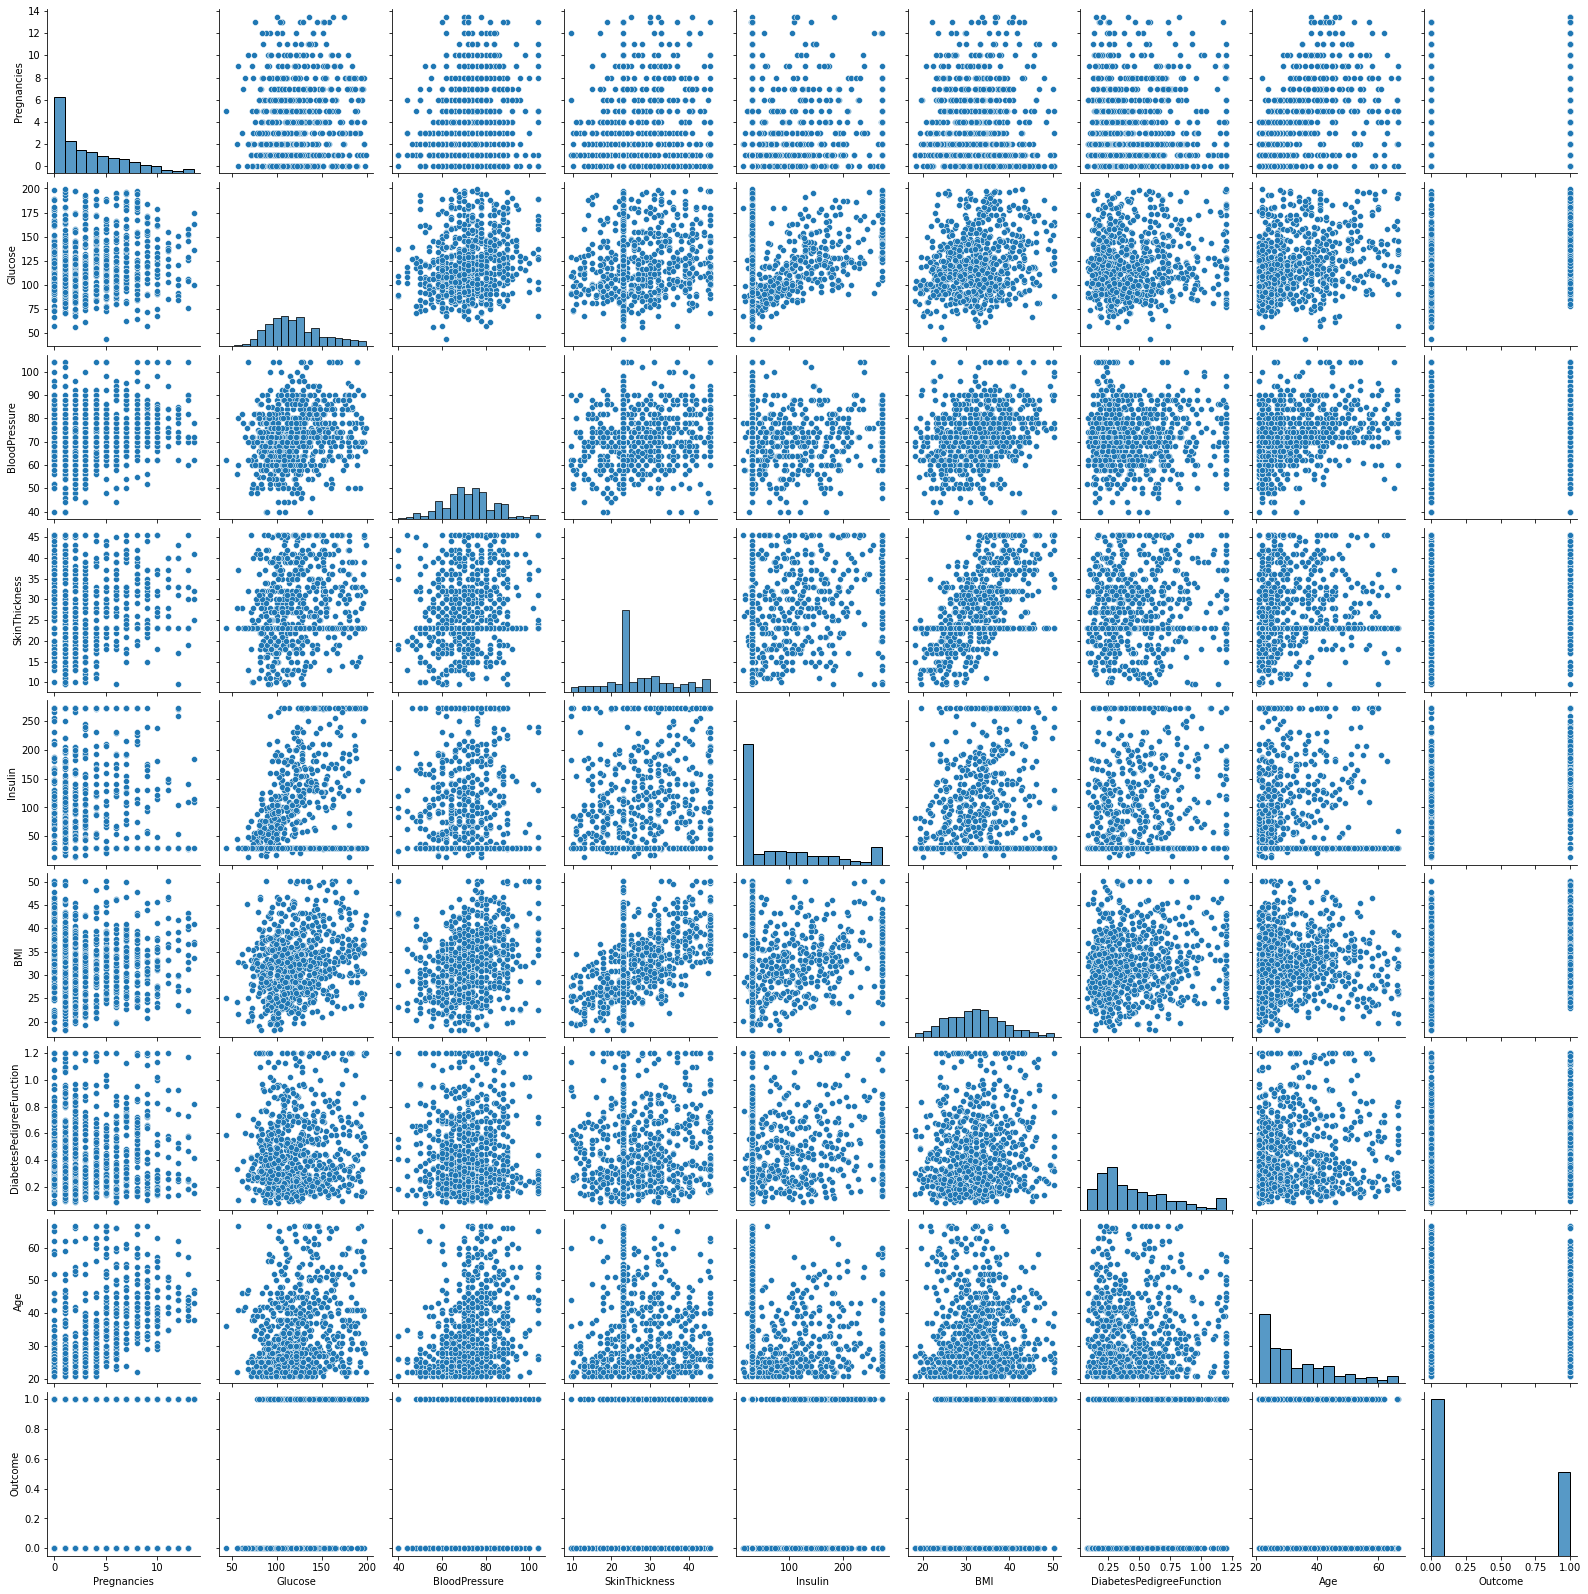

In [20]:
sns.pairplot(df)

<AxesSubplot:>

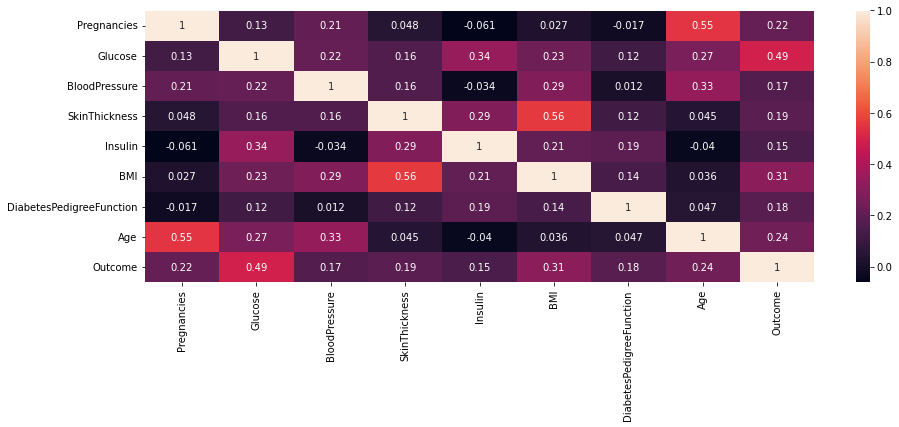

In [21]:
fig = plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>

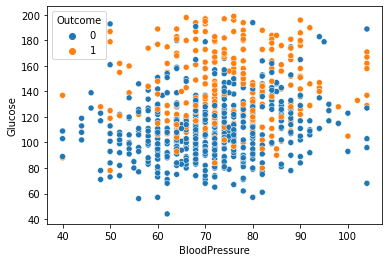

In [38]:
sns.scatterplot(x ="BloodPressure", y ="Glucose", hue ="Outcome", data= df )

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

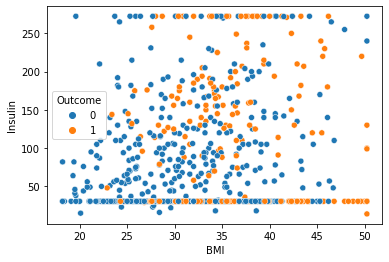

In [39]:
sns.scatterplot(x ="BMI", y ="Insulin", hue ="Outcome", data= df )

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

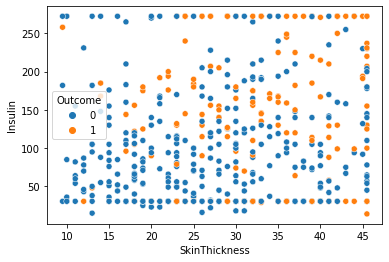

In [40]:
sns.scatterplot(x ="SkinThickness", y ="Insulin", hue ="Outcome", data= df )

In [22]:
X = df.drop(['Outcome'], axis = 1) # Independet Feature
y = df['Outcome'] # Target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decTree = DecisionTreeClassifier(criterion='entropy', max_depth =3, random_state =1)
decTree = decTree.fit(X_train, y_train)

y_pred = decTree.predict(X_test)
y_train_pred = decTree.predict(X_train)

print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of the training data:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy of the testing data: 0.7708333333333334
Accuracy of the training data: 0.765625


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110  13]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       123
           1       0.75      0.55      0.63        69

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



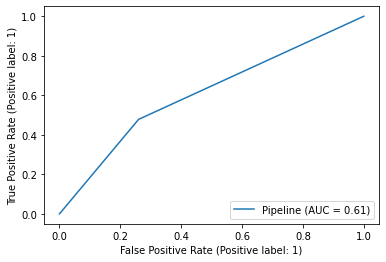

In [26]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


p =Pipeline([('scaler',StandardScaler()),('dt',DecisionTreeClassifier())])
p.fit(X_train, y_train)
plot_roc_curve(p,X_test,y_test)

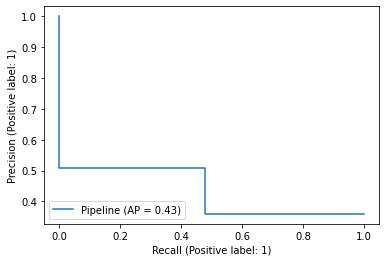

In [27]:
plot_precision_recall_curve(p,X_test,y_test)

In [28]:
# =============================================================================

In [29]:
from sklearn.svm import SVC

modelsvc = SVC()
modelsvc.fit(X_train , y_train)

pred_svc = modelsvc.predict(X_test)
pred_train_svc = modelsvc.predict(X_train)

print("Accuracy of the testing data:",metrics.accuracy_score(y_test, pred_svc))
print("Accuracy of the training data:",metrics.accuracy_score(y_train, pred_train_svc))

Accuracy of the testing data: 0.7864583333333334
Accuracy of the training data: 0.7517361111111112


In [30]:
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

[[114   9]
 [ 32  37]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       123
           1       0.80      0.54      0.64        69

    accuracy                           0.79       192
   macro avg       0.79      0.73      0.75       192
weighted avg       0.79      0.79      0.77       192



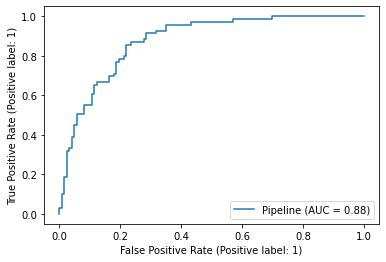

In [31]:
p =Pipeline([('scaler',StandardScaler()),('svc',SVC())])
p.fit(X_train, y_train)
plot_roc_curve(p,X_test,y_test)

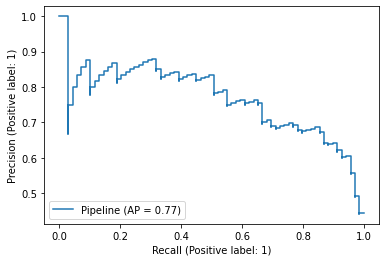

In [32]:
plot_precision_recall_curve(p,X_test,y_test)

In [33]:
# =================================================================================

In [34]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)
y_pred_train_knn = classifier.predict(X_train)

print("Accuracy of the testing data:",metrics.accuracy_score(y_test, y_pred_knn ))
print("Accuracy of the training data:",metrics.accuracy_score(y_train, y_pred_train_knn ))

Accuracy of the testing data: 0.75
Accuracy of the training data: 0.7986111111111112


In [35]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[101  22]
 [ 26  43]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       123
           1       0.66      0.62      0.64        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



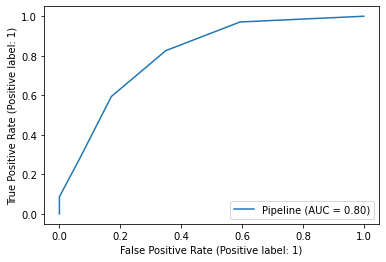

In [36]:
p =Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())])
p.fit(X_train, y_train)
plot_roc_curve(p,X_test,y_test)

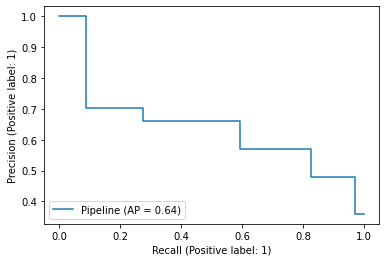

In [37]:
plot_precision_recall_curve(p,X_test,y_test)